In [7]:
pip show qiskit | grep Version

Version: 0.46.0
Note: you may need to restart the kernel to use updated packages.


In [142]:
import utils
import qiskit
import numpy as np
import qiskit_aer

In [143]:
def normalize(data):
    data = (data+1)/2
    return data/np.linalg.norm(data)

In [160]:
def reconstruct(counts,shots,data):
    da = np.zeros(len(data))
    index = np.array([int(key, 2) for key in counts])
    da[index] = list(counts.values())
    g = np.linalg.norm((data+1)/2)
    return 2*g*np.sqrt(da/shots)-1

In [161]:
num_samples = 8
time_register_size = int(np.log2(num_samples))

In [162]:
data = utils.simulate_data(num_samples=num_samples)

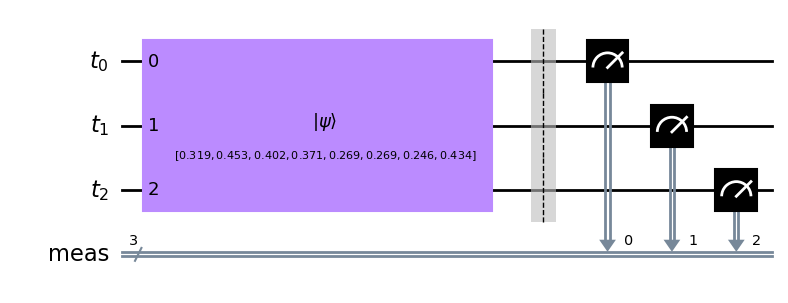

In [163]:
time_register = qiskit.QuantumRegister(time_register_size,'t')
qc = qiskit.QuantumCircuit(time_register)
qc.initialize(normalize(data))
qc.measure_all()
qc.draw('mpl',style='clifford')

In [164]:
backend = qiskit_aer.AerSimulator()
shots = 1024

In [165]:
job = qiskit.execute(qc,backend=aer,shots=1024)

/var/folders/lq/shl3t2n51mgdksn52y8zz7t00000gn/T/ipykernel_1107/1300380450.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = qiskit.execute(qc,backend=aer,shots=1024)


In [166]:
counts = job.result().get_counts()

In [168]:
out = reconstruct(counts=counts,shots=shots,data=data)

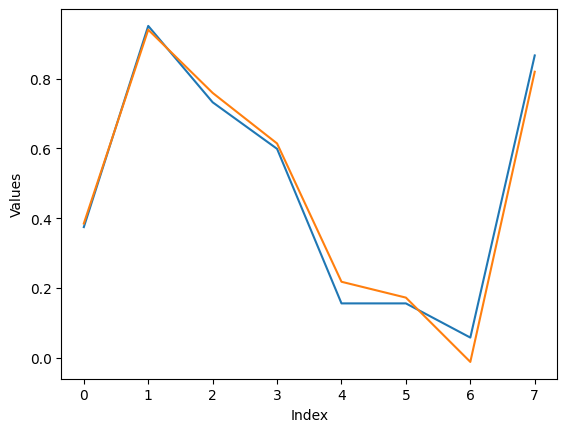

In [169]:
utils.plot([data,out])